In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pth
from random import seed
from random import random
from random import uniform
from random import randint
import math
import numpy as np


In [2]:
def randomCoordinate(xLowLimit:int, xHighLimit:int, 
                     yLowLimit:int, yHighLimit:int)->(int, int):
  ''' Generates a random floating-point coordinate 
      between two sets of coordinates provided. 
      Returns:
        - (x,y): Random Coordinate'''
  return((uniform(xLowLimit, xHighLimit),
          uniform(yLowLimit, yHighLimit)))
  
def pointInCircle(xPoint:int, yPoint:int, 
                  xCircle:int, yCircle:int, rCircle:int)->bool:
  ''' Test if a given point (x,y coordinate) lies within a 
      Circle of given center point, and radius.
      Returns: 
        - True: if point lies within the circle
        - False: if point lies outside the circle '''                  
  d = math.sqrt(pow((xPoint-xCircle),2) + pow((yPoint-yCircle),2))
  if d <= rCircle:
    return True
  else:
    return False


Running simulation with 1 iterations...
Running simulation with 10 iterations...
Running simulation with 50 iterations...
Running simulation with 100 iterations...
Running simulation with 250 iterations...
Running simulation with 500 iterations...
Running simulation with 1000 iterations...
Running simulation with 2500 iterations...
Running simulation with 5000 iterations...
Running simulation with 10000 iterations...
Running simulation with 20000 iterations...
Running simulation with 40000 iterations...
Running simulation with 80000 iterations...
Running simulation with 100000 iterations...
Running simulation with 200000 iterations...


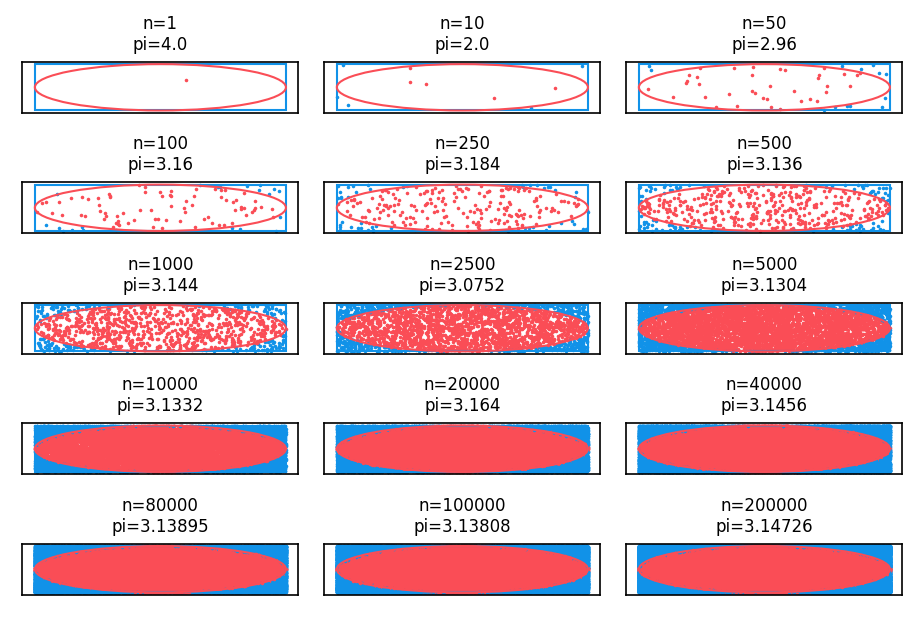

In [3]:
# graph coordinates & settings
originX:int = 1
originY:int = 1
radius:int = 6
pointSize = 0.5
sqColor = '#1192e8'
crColor = '#fa4d56'

# number of iterations for Monte Carlo simulation
iterations=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 
            10000, 20000, 40000, 80000, 100000, 200000]

# list to store computed pi-values
pi_results = []

# draw graph
plotCols:int = 3
plotRows:int = int(len(iterations)/plotCols)
figure, ax = plt.subplots(plotRows, plotCols, constrained_layout=True)
figure.set_dpi(150)
rowCounter = 0
colCounter = 0
for iteration in iterations:
  print('Running simulation with {} iterations...'.format(iteration))
  # draw square
  square = pth.Rectangle((originX,originY),
                        radius*2, radius*2,
                        linewidth=1, 
                        edgecolor=sqColor,
                        fill=False)
  # draw circle
  circle = pth.Circle((originX+radius,originY+radius),
                      radius, edgecolor=crColor, 
                      linewidth=1, fill=False) 
  
  ax[rowCounter, colCounter].add_patch(square)
  ax[rowCounter, colCounter].add_patch(circle)


  # compute & draw random points for Monte Carlo simulation
  nInnerPoints = 0
  piValue = 0
  for _ in range(iteration):
    xCord, yCord = randomCoordinate(originX,(radius*2)+1,originY,(radius*2)+1)
    if pointInCircle(xCord, yCord, originX+radius, originY+radius, radius):
      ax[rowCounter, colCounter].scatter(xCord,yCord,s=pointSize,c=crColor)
      nInnerPoints += 1
    else:
      ax[rowCounter, colCounter].scatter(xCord,yCord,s=pointSize,c=sqColor) 

  # compute pi-value and store in results
  piValue = 4 * (nInnerPoints/iteration)
  pi_results.append((iteration, piValue))

  # draw sub-plot for the current iteration
  ax[rowCounter, colCounter].set_title('n={}\npi={}'.format(iteration, 
                                                            piValue), 
                                       fontsize= 8)
  ax[rowCounter, colCounter].set_xticks([])
  ax[rowCounter, colCounter].set_yticks([]) 
  ax[rowCounter, colCounter].relim()
  ax[rowCounter, colCounter].autoscale_view()      

  # manage sub-plot position in the grid
  colCounter += 1
  if (colCounter % plotCols == 0):
    colCounter = 0
    rowCounter += 1

plt.show()


In [4]:
print("pi-values computed using Monte Carlo simulation: ")
for pi in pi_results:
  print(pi[1])


pi-values computed using Monte Carlo simulation: 
4.0
2.0
2.96
3.16
3.184
3.136
3.144
3.0752
3.1304
3.1332
3.164
3.1456
3.13895
3.13808
3.14726


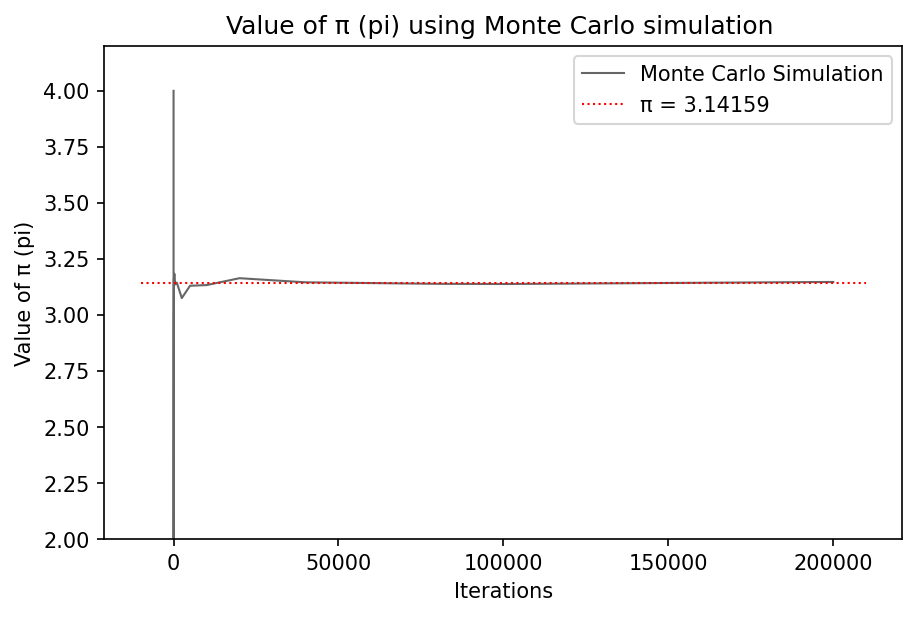

In [32]:
figure, ax = plt.subplots(constrained_layout=True)
figure.set_dpi(150)
ax.plot(*zip(*pi_results), lw=1, c='black', alpha=0.6, label="Monte Carlo Simulation")
ax.set_title('Value of π (pi) using Monte Carlo simulation '.format(iteration, piValue), fontsize= 12)
ax.set_xlabel('Iterations')
ax.set_ylabel('Value of π (pi)')

plt.plot([-10000, 210000], [3.14159, 3.14159], 'r:', lw=1, label="π = 3.14159")

plt.ylim([2.0, 4.2])
plt.legend()
plt.show()
